### The Boots Company synthesis of ibuprofen (1960's)

`CC(C)Cc1ccccc1.CC(=O)OC(C)=O>[Al](Cl)(Cl)Cl>CC(=O)c1ccc(CC(C)C)cc1` \
`CC(=O)c1ccc(CC(C)C)cc1.[Na+].CC[O-].CCOC(=O)CCl>>CCOC(=O)C1OC1(C)c2ccc(CC(C)C)cc2` \
`CCOC(=O)C1OC1(C)c2ccc(CC(C)C)cc2.[OH3+]>>CC(C)Cc1ccc(C(C)C=O)cc1` \
`CC(C)Cc1ccc(C(C)C=O)cc1.NO>>CC(C)Cc1ccc(C(C)C=NO)cc1` \
`CC(C)Cc1ccc(C(C)C=NO)cc1>>CC(C)Cc1ccc(C(C)C#N)cc1` \
`CC(C)Cc1ccc(C(C)C#N)cc1.{2}O>>CC(C)Cc1ccc(C(C)C(=O)O)cc1`

In [21]:
from rxnSMILES4AtomEco import atom_economy

#use triple quotes (""") to define a multiline string
reactions_smiles = """CC(C)Cc1ccccc1.CC(=O)OC(C)=O>Al(Cl)Cl>CC(=O)c1ccc(CC(C)C)cc1
CC(=O)c1ccc(CC(C)C)cc1.[Na+].CC[O-].CCOC(=O)CCl>>CCOC(=O)C1OC1(C)c2ccc(CC(C)C)cc2
CCOC(=O)C1OC1(C)c2ccc(CC(C)C)cc2.[OH3+]>>CC(C)Cc1ccc(C(C)C=O)cc1
CC(C)Cc1ccc(C(C)C=O)cc1.NO>>CC(C)Cc1ccc(C(C)C=NO)cc1
CC(C)Cc1ccc(C(C)C=NO)cc1>>CC(C)Cc1ccc(C(C)C#N)cc1
CC(C)Cc1ccc(C(C)C#N)cc1.{2}O>>CC(C)Cc1ccc(C(C)C(=O)O)cc1"""
atom_economy(reactions_smiles)


 Atom Economy Calculation: 

--------------------------------------------------
                     REACTANTS                    
..................................................
 SMILES:             CC(C)Cc1ccccc1
 Molecular Formula:  C10H14
 Molecular Weight:   134.22 g/mol
 Coefficient:        1.0
..................................................
 SMILES:             CC(=O)OC(C)=O
 Molecular Formula:  C4H6O3
 Molecular Weight:   102.09 g/mol
 Coefficient:        1.0
..................................................
 SMILES:             [Na+]
 Molecular Formula:  Na+
 Molecular Weight:   22.99 g/mol
 Coefficient:        1.0
..................................................
 SMILES:             CC[O-]
 Molecular Formula:  C2H5O-
 Molecular Weight:   45.06 g/mol
 Coefficient:        1.0
..................................................
 SMILES:             CCOC(=O)CCl
 Molecular Formula:  C4H7ClO2
 Molecular Weight:   122.55 g/mol
 Coefficient:        1.0
......................

#### Calculate atom economy for individual synthesis steps

In [22]:
from rxnSMILES4AtomEco import get_atom_economy
# value = get_atom_economy(reactions_smiles)
# print(value)

# Split reactions_smiles into lines
lines = reactions_smiles.splitlines()

# Create a dictionary to store the results
results_individual = {}

# Loop through each line and call get_atom_economy for each one
for i, line in enumerate(lines):
    # Create Step 1, Step 2, ..., Step n
    step_key = f"Step {i+1}"
    # Call the function and store the result
    results_individual[step_key] = get_atom_economy(line)

# Now, 'results' contains the results for each line, \
# e.g., results["Step 1"], results["Step 2"], etc.

# Example: Print all results
for step, result_individual in results_individual.items():
    print(f"{step}: {result_individual:.1f}%")

Step 1: 74.6%
Step 2: 71.5%
Step 3: 67.6%
Step 4: 91.9%
Step 5: 91.2%
Step 6: 92.4%


#### Calculate atom economy for cumulative synthesis steps

In [23]:
# Split reactions_smiles into lines
lines = reactions_smiles.splitlines()

# Create a dictionary to store the results
results_cumulative = {}

# Loop through each incremental combination of lines and call get_atom_economy
# Start from 1 to n
for i in range(1, len(lines) + 1):
    # Get the first i lines
    combined_reactions = "\n".join(lines[:i])
    
    # Call get_atom_economy with the combined lines up to the current step
    step_key = f"Step_{i}"
    # Store the result
    results_cumulative[step_key] = get_atom_economy(combined_reactions)
    
    # Example: Print the current step's result
    print(f"{step_key}: {results_cumulative[step_key]:.1f}%")

Step_1: 74.6%
Step_2: 61.5%
Step_3: 42.7%
Step_4: 42.9%
Step_5: 39.1%
Step_6: 40.1%


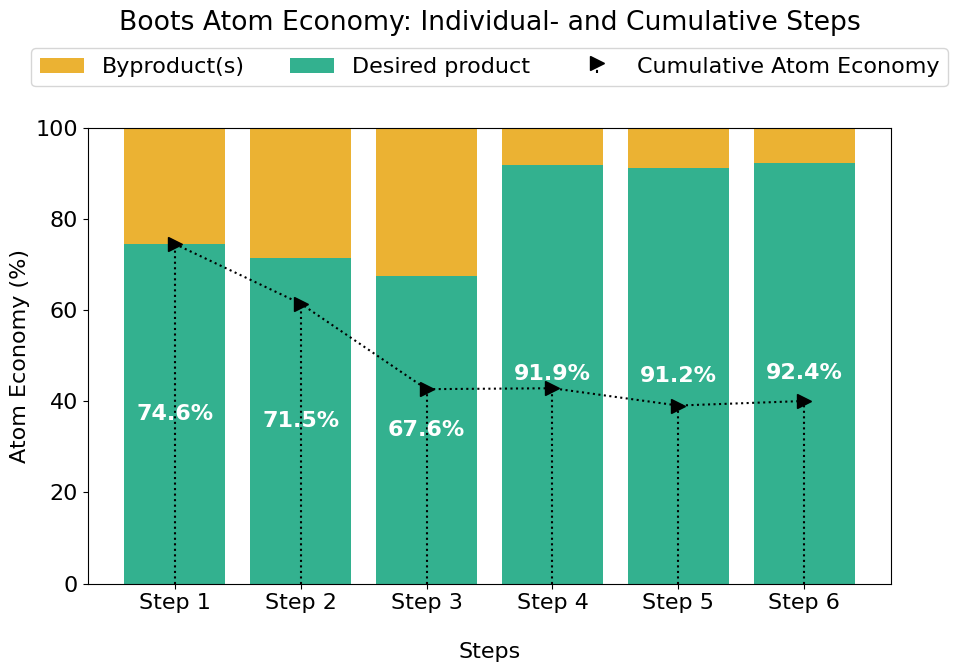

In [24]:
import matplotlib.pyplot as plt

# Extract the steps (x-axis) and Atom Economy values (y-axis) \
# for both individual and cumulative

# Step names: ['step_1', 'step_2', ...]
steps = list(results_individual.keys())
# Atom Economy values for individual reactions
individual_values = list(results_individual.values())
# Atom Economy values for cumulative reactions
cumulative_values = list(results_cumulative.values())

# Calculate the Byproduct(s) as the difference between 100% \
# and the desired product
byproduct_values = [100 - value for value in individual_values]

# Create a single plot

# Single axis for both plots
fig, ax = plt.subplots(figsize=(10, 7))
plt.rcParams.update({'font.size': 16})

# Plot the stem plot for cumulative Atom Economy values in black
ax.stem(steps, cumulative_values, linefmt='k:', markerfmt='k>:', basefmt=" ", \
        label="Cumulative Atom Economy").markerline.set_markersize(10)

# Bar plot for individual Atom Economy values

# Green bars
bars = ax.bar(steps, individual_values, color='#009E73', \
              label="Desired product", alpha=0.8)
# Orange stacked bars
ax.bar(steps, byproduct_values, bottom=individual_values, color='#E69F00', \
       label="Byproduct(s)", alpha=0.8)

# Add the text (value of desired product) in white in the middle of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.1f}%', 
             ha='center', va='center', color='white', fontweight='bold')

# Add labels and titles
ax.set_title('Boots Atom Economy: Individual- and Cumulative Steps\n\n\n')
ax.set_xlabel('\nSteps')
ax.set_ylabel('Atom Economy (%)')
# Set Y-axis from 0 to 100%
ax.set_ylim(0, 100)
# if used, uncomment for better readability \
#ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Add the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3,reverse=True)

# Improve layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()
# Save the plot
# To save the plot, if used, comment line above and uncomment lines below
#save_path = '/tmp/Boots_histogram.png'  # Writable on many systems
#plt.draw()  # Force render
#print(f"Saving to: {save_path}")
#plt.savefig(save_path, dpi=300, bbox_inches='tight')
#plt.close()
#print("Save completed (check directory).")